Halla avnit! Velkommen til jupyter project!

In [1]:
import pandas as pd
from xgboost import XGBClassifier

file_path = 'diabetes_binary_classification_data.csv'
# Try specifying the encoding
data = pd.read_csv(file_path, encoding='ISO-8859-1')  # or use 'latin1'
data.head()
# Drop the columns that are less relevant ('Sex', 'Education', 'Income')
filtered_data = data.drop(columns=["Sex", "Education", "Income", "AnyHealthcare", "NoDocbcCost", "MentHlth", "PhysHlth"])

xgb_gpu = XGBClassifier(tree_method='gpu_hist', random_state=42, eval_metric='aucpr')


# Display the first few rows of the filtered dataset
filtered_data.head()



,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,DiffWalk,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,11.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Load and split the data into features and target
X = data.drop(columns=["Diabetes_binary"])  # Features
y = data["Diabetes_binary"]  # Target

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8657954903815831
ROC-AUC Score: 0.8263699633458219
Confusion Matrix:
[[42771   968]
 [ 5841  1156]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



In [8]:
from sklearn.model_selection import GridSearchCV

# Set up a parameter grid for precision tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'alpha': [0.1, 1],  # L1 regularization
    'lambda': [0.1, 1],  # L2 regularization
    'min_child_weight': [1, 3, 5]  # Controls complexity
}

# Perform grid search with a focus on precision
grid_search_precision = GridSearchCV(estimator=XGBClassifier(random_state=42, eval_metric='aucpr'),
                                     param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='precision')

grid_search_precision.fit(X_train, y_train)

# Get the best parameters for precision
print(f"Best Parameters for Precision: {grid_search_precision.best_params_}")

# Evaluate the model with the best parameters
y_pred_grid_precision = grid_search_precision.predict(X_test)
print("\nClassification Report after Grid Search for Precision:\n", classification_report(y_test, y_pred_grid_precision))


Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best Parameters for Precision: {'alpha': 0.1, 'colsample_bytree': 0.8, 'lambda': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1}

Classification Report after Grid Search for Precision:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     65605
         1.0       0.64      0.02      0.03     10499

    accuracy                           0.86     76104
   macro avg       0.75      0.51      0.48     76104
weighted avg       0.83      0.86      0.80     76104



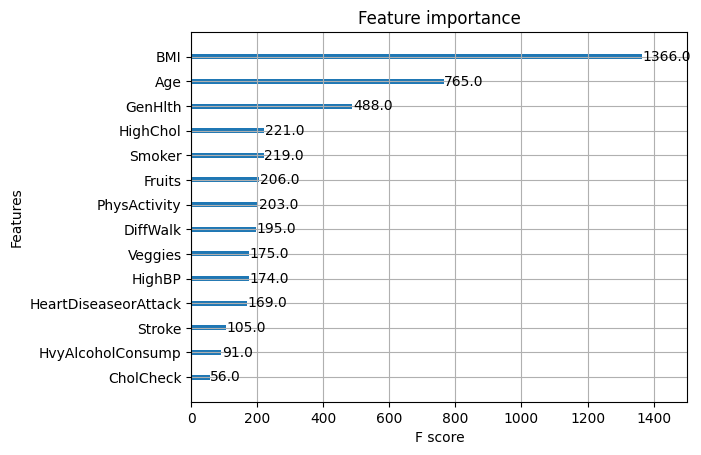

In [18]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importances
plot_importance(xgb_model_precision)
plt.show()


In [24]:
# Example of feature binning for Age
filtered_data['Age_bin'] = pd.cut(filtered_data['Age'], bins=[0, 30, 50, 65, 100], labels=['Young', 'Middle Age', 'Senior', 'Elderly'])

# Interaction feature
filtered_data['BMI_Age'] = filtered_data['BMI'] * filtered_data['Age']

# Re-run the grid search after these new features are added


In [26]:
# Apply SMOTE to resample the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize XGBClassifier with class weights
xgb_weighted_smote = XGBClassifier(random_state=42, eval_metric='aucpr', scale_pos_weight=pos_weight)

# Perform grid search on the resampled data
grid_search_weighted_smote = GridSearchCV(estimator=xgb_weighted_smote, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='precision')
grid_search_weighted_smote.fit(X_resampled, y_resampled)

# Get predictions on the test set
y_pred_weighted_smote = grid_search_weighted_smote.predict(X_test)

# Evaluate
print("\nClassification Report with SMOTE and Class Weights:\n", classification_report(y_test, y_pred_weighted_smote))


Fitting 3 folds for each of 384 candidates, totalling 1152 fits

Classification Report with SMOTE and Class Weights:
               precision    recall  f1-score   support

         0.0       0.97      0.55      0.70     65605
         1.0       0.24      0.90      0.38     10499

    accuracy                           0.60     76104
   macro avg       0.61      0.72      0.54     76104
weighted avg       0.87      0.60      0.66     76104



In [10]:
#this balnces the dataset
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler


# Prepare features (X) and target (y)
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Diabetes_binary')], axis=1)

# Check the new distribution of the target variable after undersampling
print(df_resampled['Diabetes_binary'].value_counts(normalize=True) * 100)


Diabetes_binary
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64


In [11]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Prepare features (X) and target (y)
X = data.drop('Diabetes_binary', axis=1)  # Assuming 'data' is your dataset
y = data['Diabetes_binary']

# Initialize the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Set up a parameter grid for precision tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'alpha': [0.1, 1],  # L1 regularization
    'lambda': [0.1, 1],  # L2 regularization
    'min_child_weight': [1, 3, 5]  # Controls complexity
}

# Perform grid search with a focus on precision
grid_search_precision = GridSearchCV(estimator=XGBClassifier(random_state=42, eval_metric='aucpr'),
                                     param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='precision')

# Fit the model with the resampled training data
grid_search_precision.fit(X_train, y_train)

# Get the best parameters for precision
print(f"Best Parameters for Precision: {grid_search_precision.best_params_}")

# Evaluate the model with the best parameters on the test data
y_pred_grid_precision = grid_search_precision.predict(X_test)
print("\nClassification Report after Grid Search for Precision:\n", classification_report(y_test, y_pred_grid_precision))

# Check the new distribution of the target variable after undersampling
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Diabetes_binary')], axis=1)
print("\nNew distribution of target variable after undersampling:")
print(df_resampled['Diabetes_binary'].value_counts(normalize=True) * 100)


Fitting 3 folds for each of 384 candidates, totalling 1152 fits
Best Parameters for Precision: {'alpha': 0.1, 'colsample_bytree': 0.8, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1}

Classification Report after Grid Search for Precision:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7090
         1.0       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


New distribution of target variable after undersampling:
Diabetes_binary
0.0    50.0
1.0    50.0
Name: proportion, dtype: float64
